# Analisando as notas em geral (100 filmes - Movielens)

In [1]:
!pip install seaborn

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd

notas = pd.read_csv('ratings.csv')
notas.head()  # head corresponde as 5 primeiras linhas do arquivo


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape  # shape corresponde ao formato do programa

(100836, 4)

In [4]:
notas.columns = ['usuarioID', 'filmeID', 'nota', 'momento']  # alterando o nome das colunas
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()  # quais são os valores únicos encontrados na lista

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()  # conta os valores encontrados em cada nota. Do mais frequente ao menos frequente.

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
print('Média', notas['nota'].mean())  # mostra a média das notas.
print('Mediana', notas['nota'].median())  # mostra a mediana das notas.

Média 3.501556983616962
Mediana 3.5


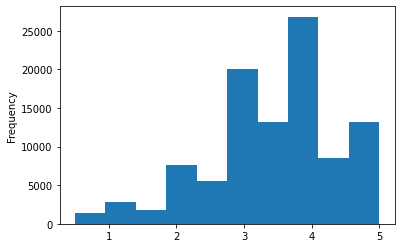

In [8]:
notas.nota.plot(kind='hist')  # plot para mostrar o gráfico e "kind" é o "tipo" e o 'hist' é o tipo Histograma

In [9]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

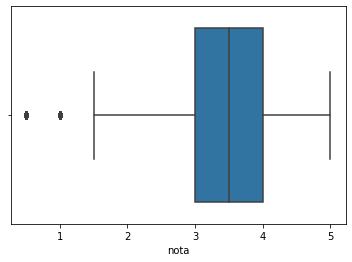

In [10]:
import seaborn as sns  # biblioteca que tem gráficos mais amigáveis 

sns.boxplot(notas.nota)  # demonstra o qeu vimos na describe, só em forma de gráfico

# Olhando os filmes (100 filmes - Movielens)

In [11]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeID', 'titulo', 'generos']
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme (100 filmes - Movielens)

In [12]:
notas.query('filmeID==1')  # query igual a pergunta. filmeId == Toy Story (baseado no ID dele)
notas.query('filmeID==1').nota  # pegando apenas as notas do filme em questão.
notas.query('filmeID==1').nota.mean()  # mostra a média das notas do filme filtrado.

3.9209302325581397

In [13]:
notas.groupby('filmeID')  # agrupei por filme
medias_por_filme = notas.groupby('filmeID').mean()['nota']  # tira a nota média de cada filme
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

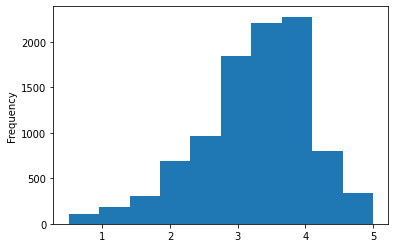

In [14]:
medias_por_filme.plot(kind='hist')  # histograma das médias por filme

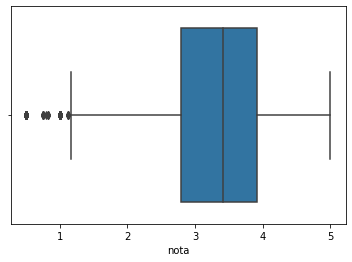

In [15]:
sns.boxplot(medias_por_filme)

In [16]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

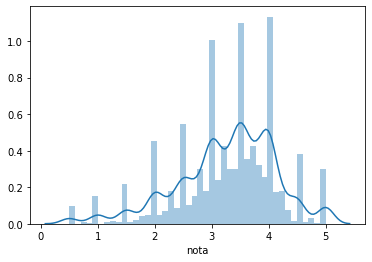

In [17]:
sns.distplot(medias_por_filme)  # é possível incluir o número de columas através de (medias_por_filme, bins=X), mas não é recomendado

Text(0.5, 1.0, 'Histograma das médias dos filmes')

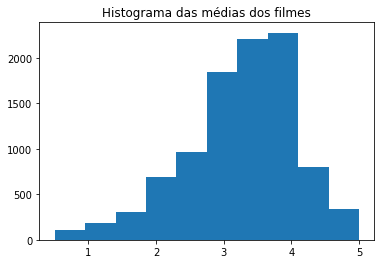

In [18]:
import matplotlib.pyplot as plt  # biblioteca que o Pandas e Seaborn utilizam para gerar seus gráficos
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

# Analisando os filmes no geral (5.000 filmes - TMDB)

In [19]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
tmdb['original_language']

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [22]:
tmdb['original_language'].value_counts().index  # indice == Index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ro', 'ar', 'id', 'cs', 'ta', 'hu',
       'no', 'nb', 'pl', 'ky', 'af', 'tr', 'xx', 'te', 'is', 'vi', 'sl', 'ps',
       'el'],
      dtype='object')

In [23]:
tmdb['original_language'].value_counts().values  # só aparece quantas vezes cada idioma consta no dataset

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [24]:
tmdb['original_language'].value_counts().to_frame()  # to_frame() aparece como uma tabela
tmdb['original_language'].value_counts().to_frame().reset_index()  # retira o indíce e o deixa como coluna, adicionando um indice em forma de contador
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


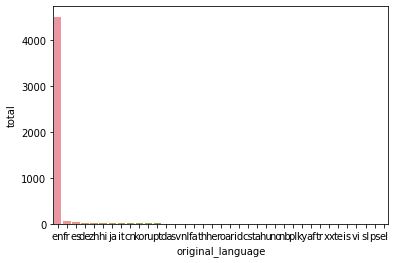

In [25]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_de_lingua)  # gráfico de barras de baixo nível

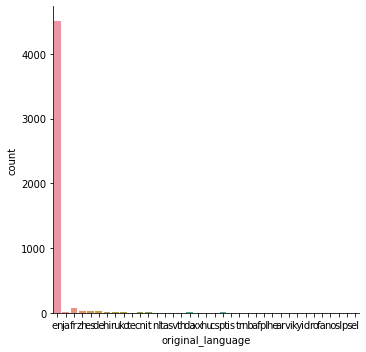

In [26]:
sns.catplot(x = 'original_language', kind='count', data = tmdb)  # Kind vai contar do arquivo "original" tmdb para gerar por categoria

In [29]:
tmdb['original_language'].value_counts()
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()  # soma todos os valores numéricos
total_de_ingles = total_por_lingua.loc['en']  # loc localiza o valor que está sendo procurado.
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [31]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


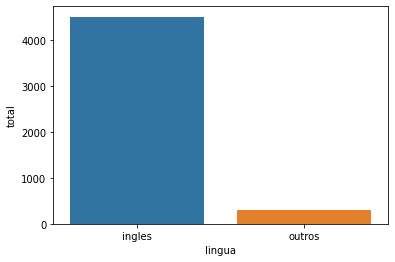

In [32]:
sns.barplot(x = 'lingua', y = 'total', data = dados)  # no eixo X estão as linguas, no eixo Y os valores e na Data é o dicionário em DataFrame

In [39]:
tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes = tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
cs     2
ar     2
ta     2
ro     2
id     2
is     1
tr     1
el     1
pl     1
te     1
no     1
ps     1
xx     1
nb     1
hu     1
vi     1
ky     1
af     1
sl     1
Name: original_language, dtype: int64

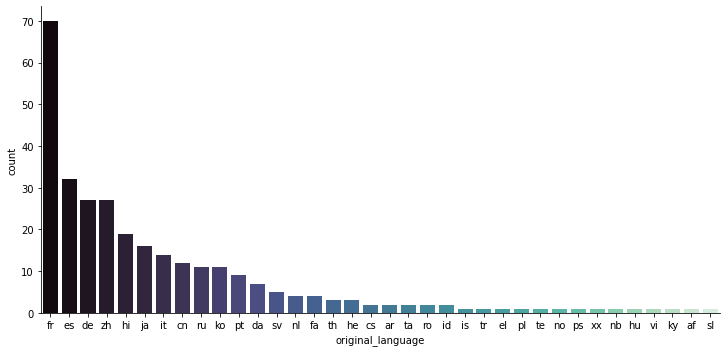

In [46]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')

# procurar sempre na documentação de cada gráfico para saber como organizá-lo

sns.catplot(x = 'original_language', kind='count', data = filmes_sem_lingua_original_em_ingles, aspect = 2,
            palette = 'mako',
            order = total_por_lingua_de_outros_filmes.index)  # aspect = 2 é o dobro do original, palette é para mudar a cor.

# Revisando o papel da média, mediana, medidas de tendência geral, dispersão, desvio padrão, boxplot, histograma

In [48]:
filmes.head(2)

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [52]:
notas_do_toy_story = notas.query('filmeID==1')
notas_do_jumanji = notas.query('filmeID==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [60]:
print(f'Nota média do Toy Story: {notas_do_toy_story.nota.mean():.2f}')
print(f'Nota média do Jumanji: {notas_do_jumanji.nota.mean():.2f}')

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [66]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1)
print(filme2)

[2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5
 3.5 3.5]
[5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1]


In [70]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fcfb1ca5c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfb1cafc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfb1cb5c90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfb1cb5750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcfb1caf1d0>,
  <matplotlib.lines.Line2D at 0x7fcfb1cbec90>]}

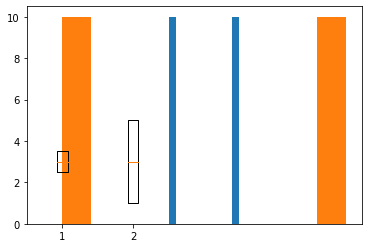

In [77]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])

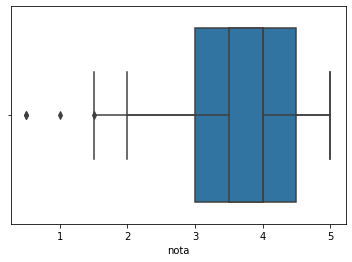

In [72]:
sns.boxplot(notas_do_toy_story.nota)
sns.boxplot(notas_do_jumanji.nota)

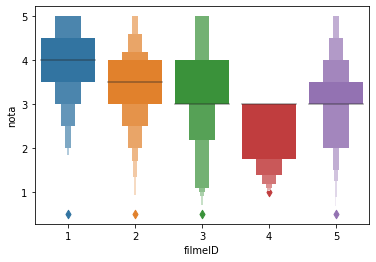

In [74]:
 sns.boxenplot(x = 'filmeID', y = 'nota', data = notas.query('filmeID in [1, 2, 3, 4, 5]'))

In [76]:
print(notas_do_jumanji.nota.std())
print(notas_do_toy_story.nota.std())

0.8817134921476455
0.8348591407114045
